In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [41]:
img = cv2.imread('mobil.jpg')

In [42]:
img.shape

(222, 177, 3)

In [43]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Ketetanggaan Piksel

In [45]:
copyCitra = img.copy().astype(float)

m1,n1 = copyCitra.shape
output1 = np.empty([m1,n1])

print("Shape CopyCitra : ", copyCitra.shape)
print("Shape output1 : ", output1.shape)

print('m1 :', m1)
print('n1 :', n1)

Shape CopyCitra :  (222, 177)
Shape output1 :  (222, 177)
m1 : 222
n1 : 177


In [46]:
for baris in range (0, m1-n1):
    for kolom in range (0, n1-1):
        a = baris
        b = baris

        jumlah = copyCitra[a-1, b-1] + copyCitra[a-1,b] + copyCitra[a-1,b-1] +\
                 copyCitra[a,b-1] + copyCitra[a,b] + copyCitra[a,b+1] +\
                 copyCitra[a+1, b-1] + copyCitra[a+1,b] + copyCitra[a+1,b+1]
        
        output1[a+b] = 1/9*jumlah

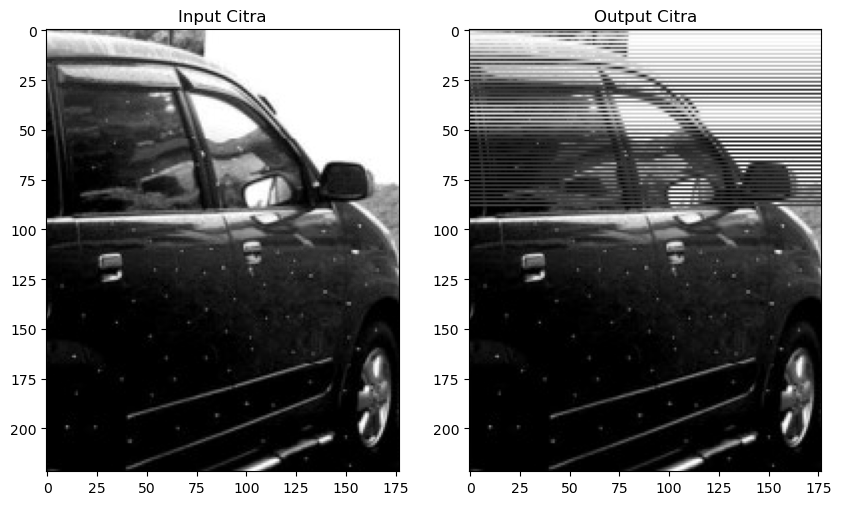

In [64]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input Citra')

ax[1].imshow(output1, cmap='gray')
ax[1].set_title('Output Citra')
plt.show()

## Membuat Filter Median

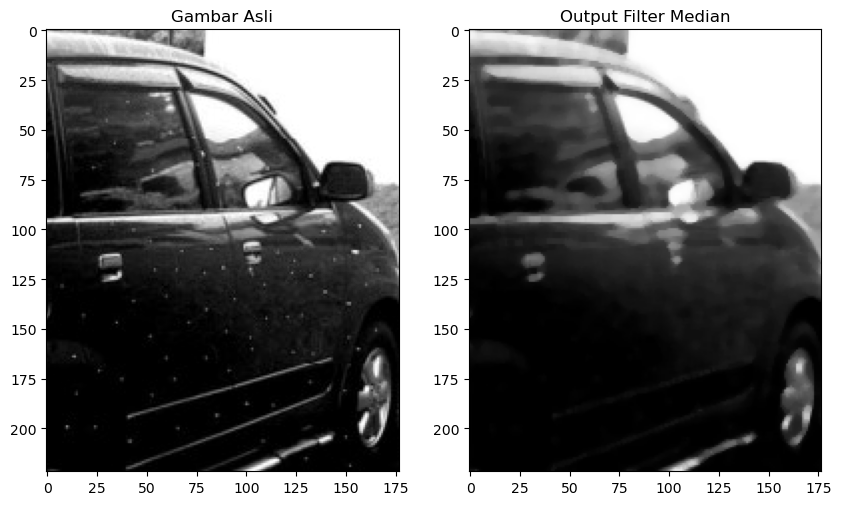

In [62]:
img_median = img.copy()
img_median = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)
img_median_after = cv2.medianBlur(img_median, 5)

fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Gambar Asli')

ax[1].imshow(img_median_after, cmap='gray')
ax[1].set_title('Output Filter Median')
plt.show()

Text(0.5, 1.0, 'Output Hasil Batas')

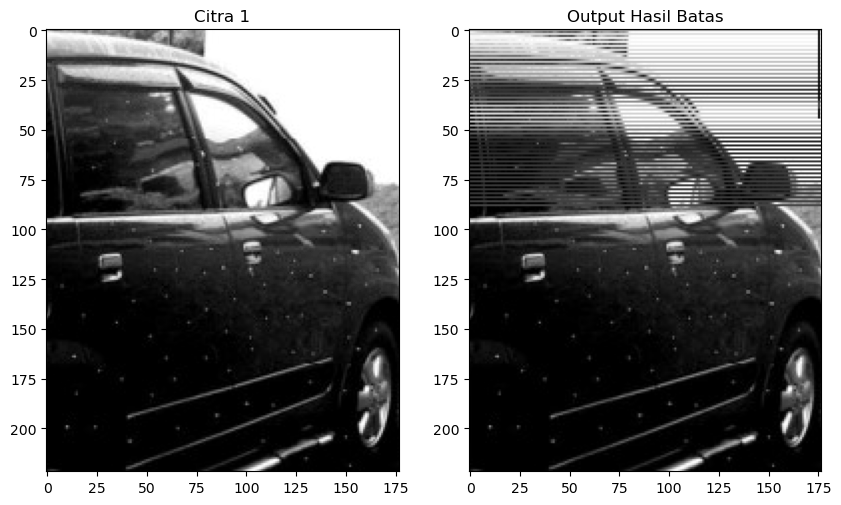

In [84]:
citra1 = img.copy().astype(float)

for baris in range (0, m1-n1):
    for kolom in range (0, n1-1):
        a = kolom
        b = baris

    arr = np.array ([citra1[a-1,b-1], citra1[a-1,b], citra1[a-1,b+1], 
                    citra1[a,b-1], citra1[a,b], citra1[a,b+1], 
                    citra1[a+1,b-1], citra1[a+1,b], citra1[a+1,b+1]])

    minPiksel = np.amin(arr)
    maxPiksel = np.amax(arr)

    if citra1[baris, kolom] < minPiksel:
        output1[baris, kolom] = minPiksel
    else:
        if citra1[baris, kolom] > maxPiksel:
            output1[baris, kolom] = maxPiksel
        else:
            output1[baris, kolom] = citra1[baris, kolom]
 
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra1, cmap='gray')
ax[0].set_title("Citra 1")

ax[1].imshow(output1, cmap='gray')
ax[1].set_title("Output Hasil Batas")

